# EmKa Akademi Bitime Projesi
## Ön tanıtım

İnternetten bir film izlemek istediğinizi hayal edin. İnternetteki film puanlamalarına ne kadar güvenebilirsiniz ? *Özellikle* reytingi gösteren aynı şirket sinema bileti satarak da para kazanıyorsa. Sizce de derecelendirme konusunda insanları yanlış yönlendirmesi söz konusu olabilir mi ?

### Hedef:

**Amacınız aşağıdaki görevleri tamamlayarak *Fandango* websitesinin ratingler konusunda bir yanlış yapıp yapmadığını emin bir şekilde ispatlamak**

---
---

** Bu da bir sorulu analizdir. Aşağıda sorulan sorulara cevap vermeye ve çıktılara yakın bir çıktı elde etmeye çalışmanız gerekmektedir. **

---
----

## Part One: Datayı Anlamak

### The Data

Elimizde biri şüphelenilen *Fandango* sitsine ait yıldızlar ve film derecelendirmeleri içeriyor. Diğeri ise diğer film sitelerindeki film derecelendirmeleri için veriler içeren toplam 2 csv dosyası vardır.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` Bütün benzeri sitelerin açıklama kullanıcı puanlamaları bilgilerini ve özellikle 'Rotten Tomatoes(Çürük Elma) adlı bir filme ait başka sitelerdeki puanları içermektedir.'

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` Fandango sitesine ait 538 film içermektedir

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Analizinde işinize yarayacağını düşündüğünüz kütüphanaleri import edin:**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Part Two: Fandango sitesini keşfetmeye çalışalım. Gerçek kullanıcı derecelendirmelerini ve site puanlarını yavaştan karşılaştıralım

Fandangonun filmleri puanlama ve derecelendirme konusunda taraflı davranıp davranmadığını analiz etmeye başlayalım !

**TASK: Aşağıdaki fandango_scrape.csv dosyasını çalıştırın**

In [51]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Fandango verilerini keşfetmeye çalışın. Aşağıdakine benzer çıktılar elde edin.**

# Uyarı ! çıktının tam üstünü kullanmayın. Bir üst hücre satırında çalışmalar yapın.

In [10]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [176]:
# Buraya kod yazmayın !

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [11]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [177]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [13]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [178]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Verimizdeki filmlere ait votes ile rating arasındaki ilişkiyi keşfedelim. Derecelendirme ve oylar arasındaki ilişkiyi gösteren bir scatterplot grafiği oluşturun. Görsel stil eklemeler tamamen size kalmış**

<Axes: xlabel='RATING', ylabel='VOTES'>

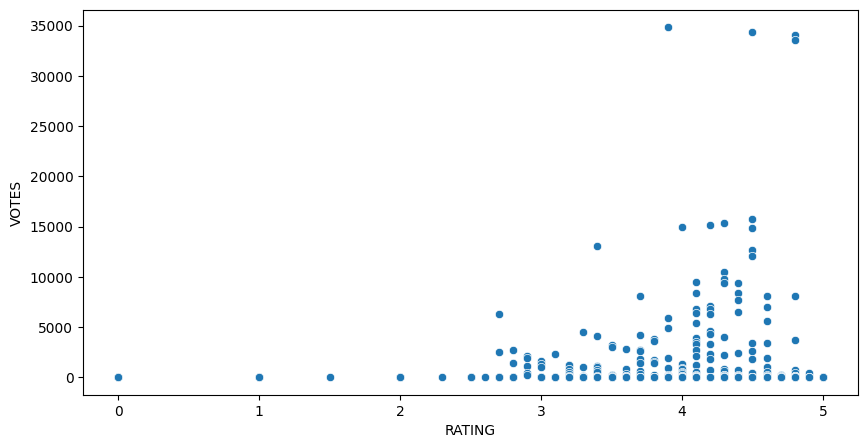

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.scatterplot(data= fandango, x= "RATING", y= "VOTES",ax=ax, legend=False)



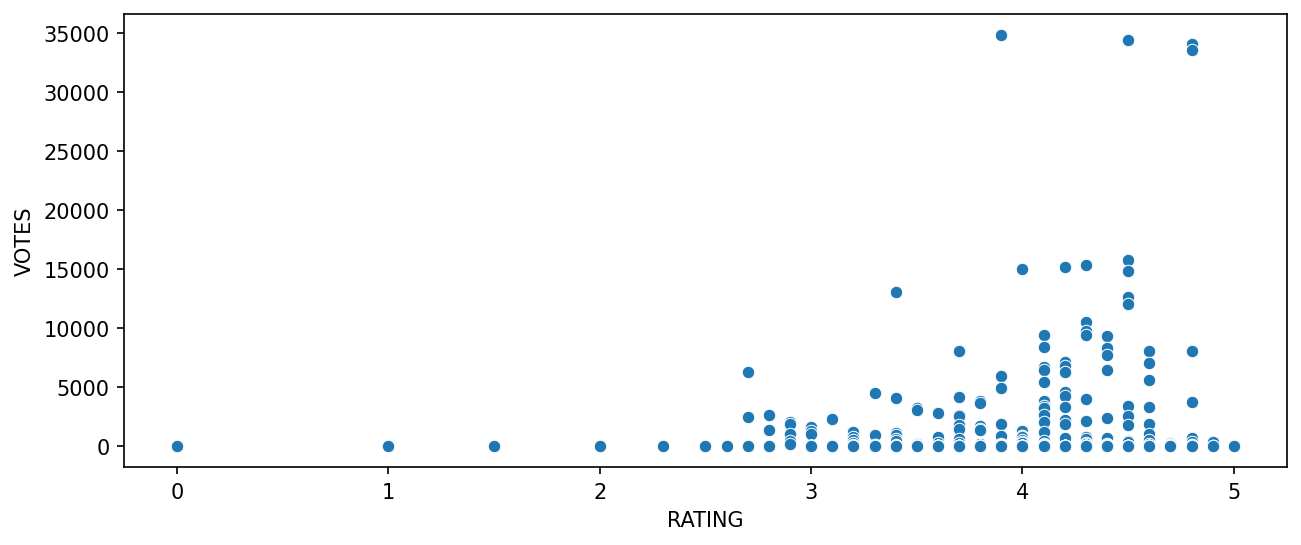

**TASK: Bütün columnlar arasındaki ilişkiye bakın**

In [24]:
fandango.corr()

C:\Users\Grundig\AppData\Local\Temp\ipykernel_6396\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Bir şekilde 'Yıl' sütunu ekleyin**

In [32]:
fandango["Yıl"]=fandango["FILM"].astype(str).str[-6:]
fandango

,FILM,STARS,RATING,VOTES,Yıl
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,(2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,(2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,(2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,(1964)


In [7]:
# Buraya kod yazın

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


**TASK: Elimizdeki Fandango verilerinde yıl başına düşen film sayılarını bulun**

In [52]:
fandango.sort_values(("FILM"), ascending=False)["Yıl"].value_counts()

(2015)    478
(2014)     23
(2012)      1
(1964)      1
(2016)      1
Name: Yıl, dtype: int64

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Bir plot ile yıllara düşen film sayılarını görselleştirin:**

<Axes: xlabel='Yıl', ylabel='count'>

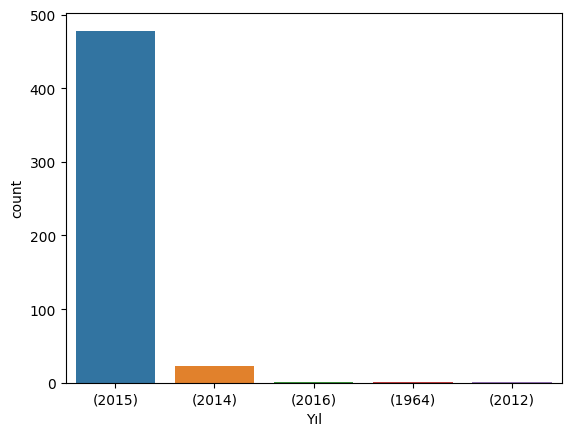

In [56]:
sns.countplot(x =fandango.sort_values(("FILM"))["Yıl"],data = fandango)

<AxesSubplot:xlabel='YEAR', ylabel='count'>

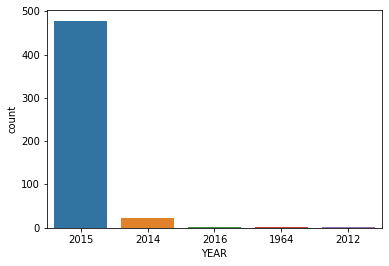

**TASK: En fazla oyu alan 10 film hangileridir?**

In [70]:
fandango.sort_values("VOTES",ascending=False).head(10)

,FILM,STARS,RATING,VOTES,Yıl
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,(2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,(2015)
7,Minions (2015),4.0,4.0,14998,(2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,(2015)
9,Into the Woods (2014),3.5,3.4,13055,(2014)


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: Kaç tane film 0 vote'u aldı ?**

In [78]:
fandango[(fandango["VOTES"]==0)].value_counts().sum()

69

69

**TASK: Sıfır oyu olan filmleri kaldırarak yalnızca incelenen filmlerin dataframe'ini oluşturun.**

In [109]:
fandango = fandango[fandango['VOTES'] != 0]

In [126]:
fandango

,FILM,STARS,RATING,VOTES,Yıl
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015)
431,The Intern (2015),5.0,5.0,1,(2015)
432,The Park Bench (2015),5.0,5.0,1,(2015)
433,The Wanted 18 (2015),5.0,5.0,1,(2015)


**TASK: Bazı filmlerde usulsüzlük yapıldığı ve kullanıcılara gösterilen STARS değerlerinin gerçek RATING değerlerinden biraz daha fazla çıktığı düşünüyoruz. 'STARS_DIFF' adında yeni bir column ekleyerek STARS ile RATING arasındaki farkları bu column'da tutun.**

In [136]:
fandango["STARS_DIFF"]=fandango["STARS"]-fandango["RATING"]
fandango["STARS_DIFF"]=fandango["STARS_DIFF"]

C:\Users\Grundig\AppData\Local\Temp\ipykernel_6396\1968436417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango["STARS_DIFF"]=fandango["STARS"]-fandango["RATING"]
C:\Users\Grundig\AppData\Local\Temp\ipykernel_6396\1968436417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango["STARS_DIFF"]=fandango["STARS_DIFF"]


Index(['FILM', 'STARS', 'RATING', 'VOTES', 'Yıl', 'STARS_DIFF'], dtype='object')

In [137]:
fandango

,FILM,STARS,RATING,VOTES,Yıl,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,(2015),0.0
2,American Sniper (2015),5.0,4.8,34085,(2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,(2015),0.2
4,Inside Out (2015),4.5,4.5,15749,(2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015),0.0
431,The Intern (2015),5.0,5.0,1,(2015),0.0
432,The Park Bench (2015),5.0,5.0,1,(2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,(2015),0.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: STARS_DIFF sütunundaki verilerin kaçar kez oluştuğunu count edin ve plotlayın**

In [139]:
fandango["STARS_DIFF"].value_counts()


0.0    107
0.2     82
0.3     72
0.4     44
0.1     40
0.5     37
0.1     26
0.4     26
1.0      1
Name: STARS_DIFF, dtype: int64

<Axes: xlabel='STARS_DIFF', ylabel='count'>

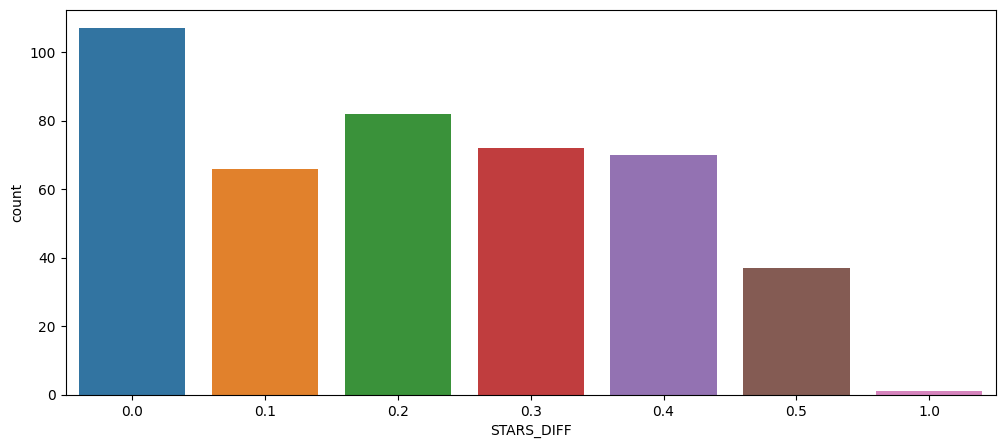

In [171]:
plt.figure(figsize=(12,5))
sns.countplot(x=fandango["STARS_DIFF"].round(2),data=fandango)

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

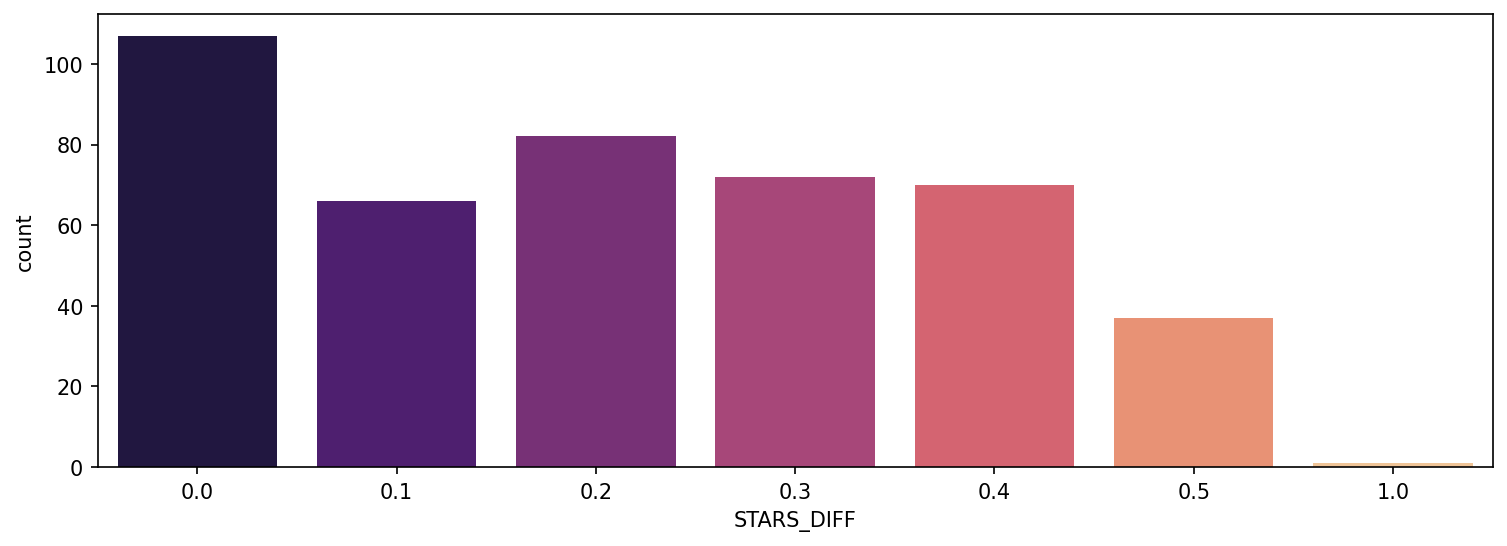

**TASK Üstteki plot'dan gördüğümüz üzere STARS_DIFF'i 1 olan film bile var. Bu çok yoğun usulsüzlük yapılan filmi getirin ve inceleyelim.**

In [181]:
fandango[(fandango["STARS_DIFF"]==1)]

,FILM,STARS,RATING,VOTES,Yıl,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,(2015),1.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Fandango Puanlamalarını Başka Sitelerle Karşılaştıralım

**TASK: "all_sites_scores.csv" dosyasını okuyun**

In [33]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Bu csv dosyasını da keşfetmek için temel analiz başlangıcı kodlarını yazın.**

In [183]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [184]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [187]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Önce Rotten Tomatoes'i inceleyelim. RottenTomatoes adında gerçek yorumcuların derecelendirmeleri ve RottenTomatoes_User adında kullanıcıların derecelendirmelerini içeren bir sütun bulunuyor. Bu sütunları plot edelim.

**TASK: Aşağıdaki gibi bir scatterplot oluşturun.**

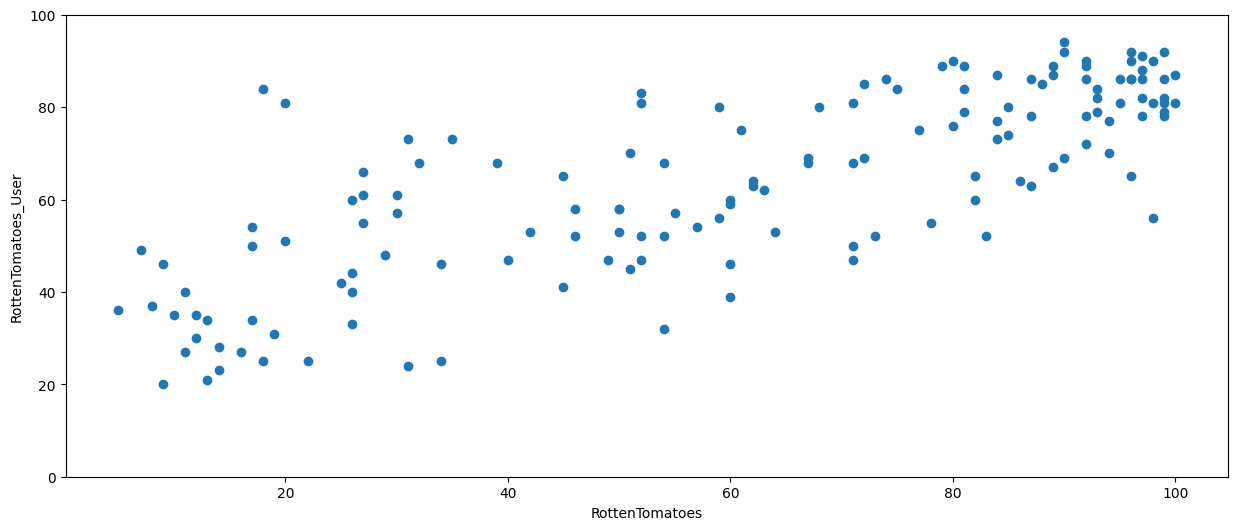

In [199]:
fig,ax=plt.subplots(figsize=(15,6))
ax.scatter(all_sites['RottenTomatoes'],all_sites['RottenTomatoes_User'])
ax.set_xlabel('RottenTomatoes')
ax.set_ylabel('RottenTomatoes_User')
ax.set_yticks(np.arange(0, 110, 20))
plt.show()


(0.0, 100.0)

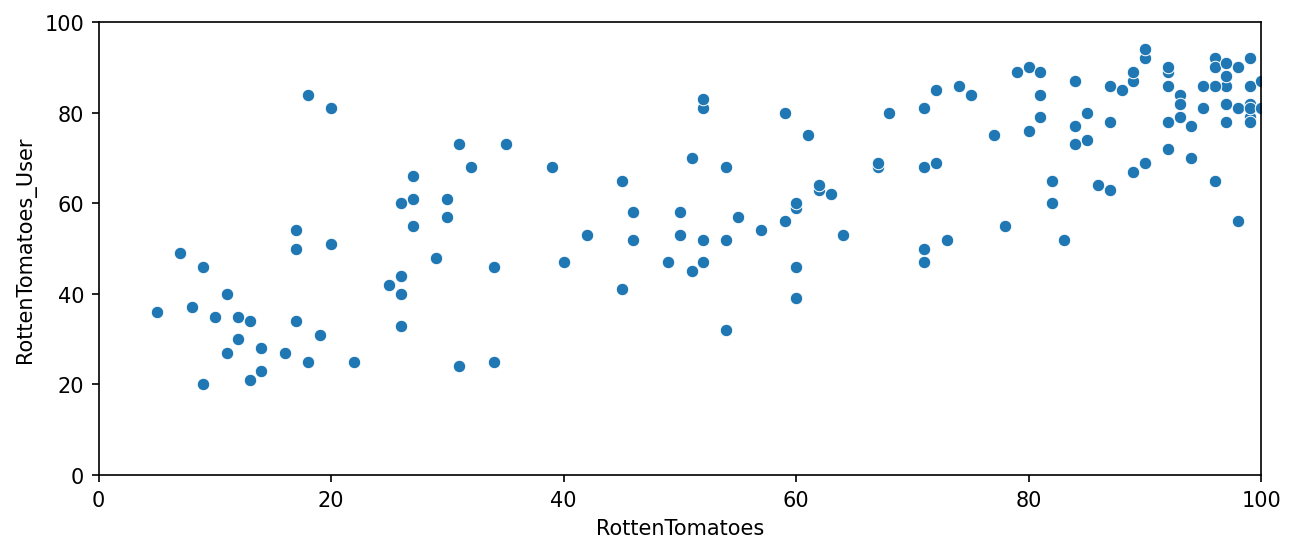

**TASK: Rotten DIFF adında bir column oluşturun ve bu column RottenTomatoes-RottenTomatoes_User bilgilerinden oluşsun.**

In [40]:
RottenDIFF=all_sites["Rotten_DIFF"]=all_sites["RottenTomatoes"]-all_sites["RottenTomatoes_User"]
all_sites["Rotten_DIFF"]=RottenDIFF

**TASK: RT Eleştirmen Puanı ile RT Kullanıcı Puanı arasındaki farkların dağılımını çizin. Bu dağılım grafiğinde negatif değerler olmalıdır. Bu dağıtımı görüntülemek için KDE veya Histogramları kullanabilirsiniz**

<Axes: xlabel='Rotten_DIFF', ylabel='Count'>

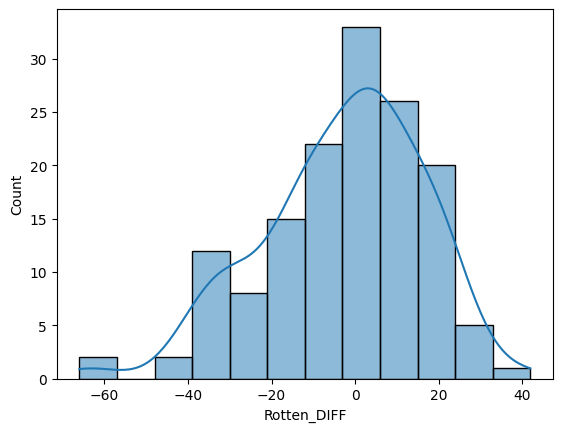

In [135]:
sns.histplot(data=all_sites, x="Rotten_DIFF",kde="Rotten_DIFF")

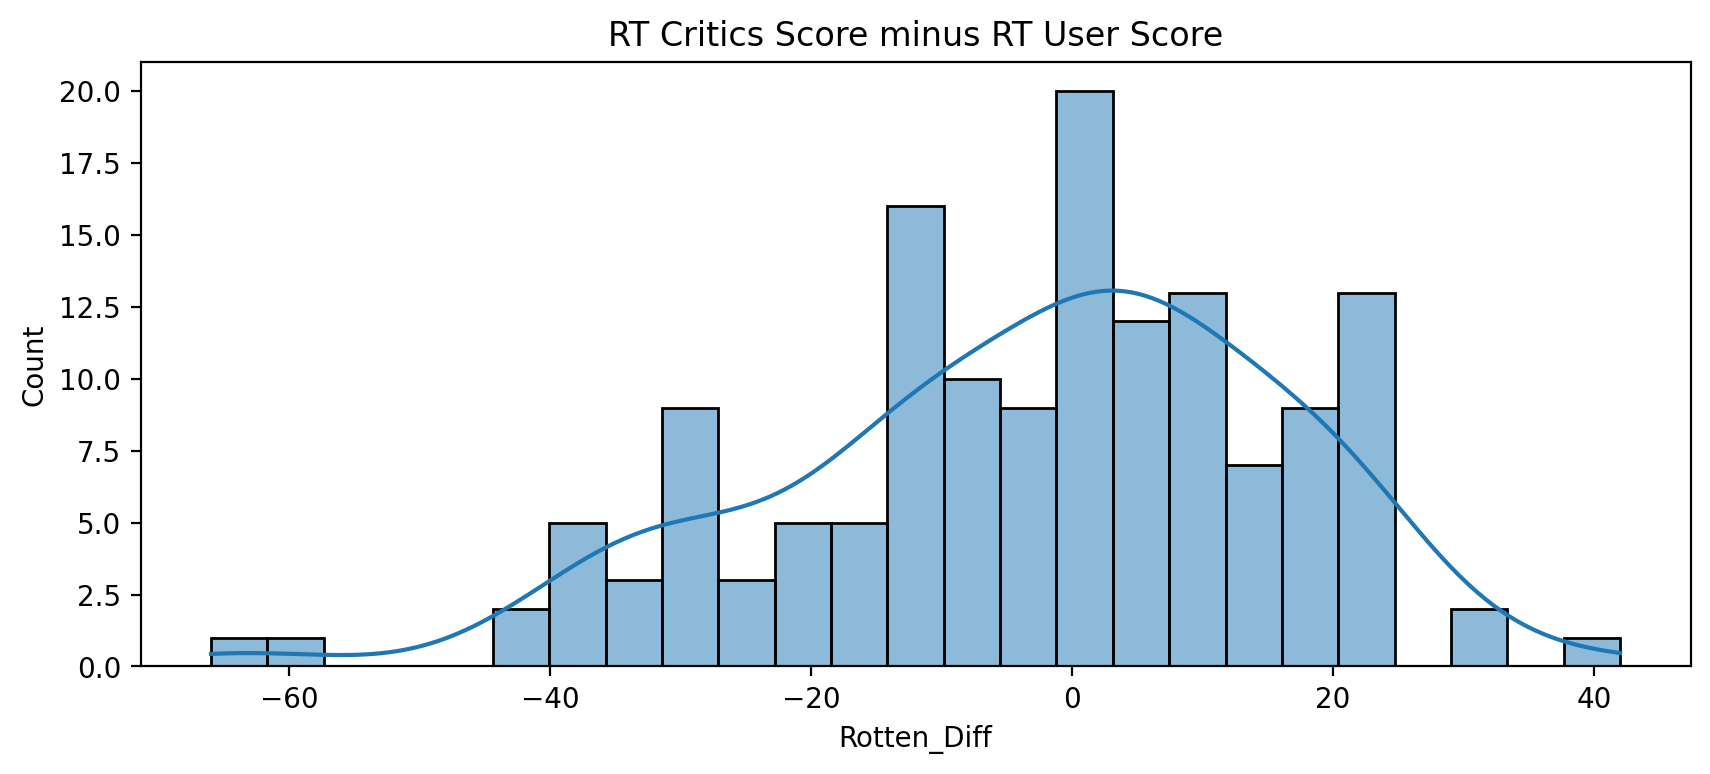

**Hadi Kullanıcı ile eleştirmen puanlamaları arasındaki farkın(Rotten_Diff) en yüksek ve en düşük olduğu filmlere bi bakalım.**

**TASK: Ortalama olarak kullanıcıların, eleştirmenlerden daha fazla sevdiği 5 filmi getirin.**

In [48]:
all_sites[["Rotten_DIFF","FILM"]].sort_values("Rotten_DIFF",ascending=True).head(5)

,Rotten_DIFF,FILM
3,-66,Do You Believe? (2015)
85,-61,Little Boy (2015)
134,-42,The Longest Ride (2015)
105,-42,Hitman: Agent 47 (2015)
125,-39,The Wedding Ringer (2015)


Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Şimdi de tam tersi, kullanıcıların eleştirmenlerden bile daha çok sevmediği 5 filmi getirin**

In [49]:
all_sites[["Rotten_DIFF","FILM"]].sort_values("Rotten_DIFF",ascending=False).head(5)

,Rotten_DIFF,FILM
69,42,Mr. Turner (2014)
112,31,It Follows (2015)
115,31,While We're Young (2015)
145,24,"Kumiko, The Treasure Hunter (2015)"
37,24,Welcome to Me (2015)


Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Burdan sonraki analizlerde sizi özgür bırakıyoruz. İstediğiniz her şeye bakabilir her türlü incelemeyi ve plot'u çizdirebilirsiniz. Ve en sonunda ulaşmanızı istediğimiz bir sonuç var. *Fandango* sitesi kullanıcıları film puanlamaları konusunda kayda değer ölçüde kandırıyor çünkü .... şeklinde bir karara varmanız ya da *Fandango* sitesi diğer sitelere benzer bir tutum sergiliyor ve herhangi bir yanlış yönlendirme yapmıyor çünkü .... şeklinde bir karara varmanız. 

Varacağınız bu kararı maddeler ve kanıtlar halinde notebook'unuzun en altında mantıklı bir şekilde delilleriyle açıklayın. Burada hangi karara varırsanız varın önemli olan ve bizim de EmKa Academy olarak dikkat edeceğimiz şey, ulaştığınız kararı düzgün bir şekilde açıklayabiliyor musunuz ? Asıl odaklandığımız nokta sonuçtan ziyade bu. O yüzden en altta maddeler halinde kararınızı açıklarken dikkatli davranın. 

In [125]:
fandango[fandango["STARS"]==3]

,FILM,STARS,RATING,VOTES
29,Fantastic Four (2015),3.0,2.7,6288
53,Poltergeist (2015),3.0,2.8,2704
58,Unfriended (2015),3.0,2.7,2507
63,It Follows (2015),3.0,2.9,2097
66,The Gallows (2015),3.0,2.9,1896
72,The Lazarus Effect (2015),3.0,3.0,1651
75,Blackhat (2015),3.0,2.8,1430
78,The Woman In Black 2 Angel of Death (2015),3.0,3.0,1333
83,Inherent Vice (2014),3.0,2.9,1078
107,While We're Young (2015),3.0,2.9,449


In [116]:
all_sites[["RottenTomatoes","FILM"]].sort_values("RottenTomatoes",ascending=True).head(5)

,RottenTomatoes,FILM
133,5,Paul Blart: Mall Cop 2 (2015)
105,7,Hitman: Agent 47 (2015)
53,8,Hot Pursuit (2015)
48,9,Fantastic Four (2015)
15,9,Taken 3 (2015)


In [117]:
all_sites[["RottenTomatoes_User","FILM"]].sort_values("RottenTomatoes_User",ascending=True).head(5)

,RottenTomatoes_User,FILM
48,20,Fantastic Four (2015)
107,21,The Vatican Tapes (2015)
135,23,The Lazarus Effect (2015)
79,24,Poltergeist (2015)
82,25,Blackhat (2015)


In [119]:
all_sites[["Metacritic_User","FILM"]].sort_values("Metacritic_User",ascending=True).head(5)

,Metacritic_User,FILM
35,2.4,The Loft (2015)
133,2.4,Paul Blart: Mall Cop 2 (2015)
48,2.5,Fantastic Four (2015)
97,3.2,Fifty Shades of Grey (2015)
59,3.2,Mortdecai (2015)


In [121]:
all_sites[["IMDB","FILM"]].sort_values("IMDB",ascending=True).head(5)

,IMDB,FILM
48,4.0,Fantastic Four (2015)
97,4.2,Fifty Shades of Grey (2015)
133,4.3,Paul Blart: Mall Cop 2 (2015)
101,4.4,The Gallows (2015)
107,4.6,The Vatican Tapes (2015)


##### Yukarıda yapılan çıkarımlara bakarak; Fantastic Four (2015) filmi all_sites DataFrame'inde en kötü puanlamayı almasına rağmen fandango DataFrameinde 1 puanlama içerisine girmemiştir ve 3 puan almıştır.Bu da verilerdeki doğruluk payının var olduğunun bir göstergesidir

2.YOL

In [126]:
fandango[fandango["STARS"]==5]

,FILM,STARS,RATING,VOTES
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
10,Cinderella (2015),5.0,4.5,12640
11,Ant-Man (2015),5.0,4.5,12055
...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1
431,The Intern (2015),5.0,5.0,1
432,The Park Bench (2015),5.0,5.0,1
433,The Wanted 18 (2015),5.0,5.0,1


In [127]:
all_sites[["RottenTomatoes","FILM"]].sort_values("RottenTomatoes",ascending=False).head(92)

,RottenTomatoes,FILM
144,100,Gett: The Trial of Viviane Amsalem (2015)
70,100,Seymour: An Introduction (2015)
119,99,Phoenix (2015)
41,99,Timbuktu (2015)
96,99,Song of the Sea (2014)
...,...,...
87,54,Maggie (2015)
36,52,5 Flights Up (2015)
138,52,Spare Parts (2015)
110,52,Escobar: Paradise Lost (2015)


In [128]:
all_sites[["RottenTomatoes_User","FILM"]].sort_values("RottenTomatoes_User",ascending=False).head(92)

,RottenTomatoes_User,FILM
76,94,Straight Outta Compton (2015)
14,92,The Imitation Game (2014)
96,92,Song of the Sea (2014)
28,92,Wild Tales (2014)
129,91,Amy (2015)
...,...,...
23,59,Run All Night (2015)
16,58,Ted 2 (2015)
18,58,Night at the Museum: Secret of the Tomb (2014)
75,58,San Andreas (2015)


In [129]:
all_sites[["Metacritic_User","FILM"]].sort_values("Metacritic_User",ascending=False).head(92)

,Metacritic_User,FILM
42,9.6,About Elly (2015)
140,8.9,Inside Out (2015)
28,8.8,Wild Tales (2014)
143,8.8,"Two Days, One Night (2014)"
129,8.8,Amy (2015)
...,...,...
45,6.4,Tomorrowland (2015)
54,6.4,The DUFF (2015)
106,6.4,Cake (2015)
31,6.4,When Marnie Was There (2015)


In [130]:
all_sites[["IMDB","FILM"]].sort_values("IMDB",ascending=False).head(92)

,IMDB,FILM
140,8.6,Inside Out (2015)
76,8.4,Straight Outta Compton (2015)
95,8.4,The Salt of the Earth (2015)
88,8.3,Mad Max: Fury Road (2015)
28,8.2,Wild Tales (2014)
...,...,...
54,6.6,The DUFF (2015)
99,6.6,Focus (2015)
23,6.6,Run All Night (2015)
83,6.6,Self/less (2015)


Fandango DataFrame'inde 92 tane 5 yıldız alan parametre varken, all_sites DataFrame'indeki sütunları incelediğimde en yüksek puanı alan 92 satır değerlerinde en yüksek ve en düşük puan bazında %50 gibi oranda çok büyük fark olduğunu görmüş oluyoruz. fandango sitesi sonuçları hatalı veriyor

# BAŞARILAR

----